<a href="https://colab.research.google.com/github/kaueag/bibliotecapandas/blob/main/trabalhando_com_duas_bases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
vendas = pd.read_excel('varejo.xlsx')
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [4]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [5]:
vendas.groupby('idcanalvenda').idcompra.nunique().reset_index()

,idcanalvenda,idcompra
0,APP,139
1,Aplicativo,21425
2,Internet,24515
3,Mobile,24732


In [6]:
vendas['idcanalvenda'] = vendas['idcanalvenda'].str.replace('APP', 'Aplicativo')
vendas.groupby('idcanalvenda').idcompra.nunique().reset_index()

,idcanalvenda,idcompra
0,Aplicativo,21539
1,Internet,24515
2,Mobile,24732


In [7]:
vendas.groupby('Nome_Departamento').idcompra.nunique().reset_index()

,Nome_Departamento,idcompra
0,Acessorios e Inovacoes,3548
1,Alimentos,2
2,Ar e Ventilacao,951
3,Audio,1794
4,Automotivo,895
5,Bebes,4531
6,Beleza e Saude,4626
7,Brinquedos,1320
8,"Cama, Mesa e Banho",153
9,Casa e Construcao,263


In [8]:
vendas.groupby('estado').idcompra.nunique().reset_index()

,estado,idcompra
0,AC,10
1,AL,461
2,AM,15
3,AP,3
4,BA,2028
5,CE,1007
6,DF,1902
7,ES,1254
8,GO,1603
9,MA,129


In [9]:
vendas[vendas['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones e Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar e Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar e Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones e Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones e Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs e Acessorios,NaN,17784


In [10]:
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [11]:
vendas['estado'].fillna('MS', inplace=True) #essa linha é igual a fazer vendas['estado'] = vendas['estado'].fillna('MS')

In [12]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [13]:
media_preco = vendas['Preço'].mean()
vendas['Preço'].fillna(media_preco, inplace = True)

In [14]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [15]:
vendas[['Preço', 'Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [16]:
preco_errado = vendas.query("Preço > Preço_com_frete")
vendas_correto = vendas.query("Preço < Preço_com_frete")
vendas_correto.describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047.000000,22047.000000,22047.000000
mean,253799.955550,549.518401,567.332688,13856.313013
std,144794.628563,846.295127,863.458763,8049.120135
min,25.000000,8.720000,9.512000,1.000000
25%,127670.000000,93.528000,100.800000,6858.000000
50%,257885.000000,183.200000,193.912000,13845.000000
75%,379705.000000,661.680000,676.736000,20801.000000
max,499960.000000,14391.200000,14407.120000,27982.000000


In [17]:
vendas_correto.query("Nome_Departamento == 'Esporte e Lazer' and estado == 'SP'").describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,168.000000,168.000000,168.00000,168.000000
mean,265130.744048,1070.083095,1098.71319,14368.571429
std,140435.252208,617.138494,620.66244,7890.233136
min,2145.000000,10.896000,16.11200,210.000000
25%,157955.000000,527.200000,545.32000,7717.500000
50%,253702.500000,1108.008000,1136.24800,15281.000000
75%,380616.250000,1599.200000,1618.88400,20538.000000
max,496910.000000,2399.200000,2432.74400,27837.000000


In [18]:
vendas_correto.groupby('Nome_Departamento').idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades Domesticas,1366
5,Acessorios e Inovacoes,1243
6,Beleza e Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos de Limpeza,522


In [19]:
round(vendas_correto.groupby('Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs e Acessorios,3469.38
1,Informatica,2159.78
2,Linha Industrial,2027.11
3,Cine e Foto,1851.20
4,Telefones e Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte e Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos Musicais,834.61


In [20]:
vendas_correto.groupby('Data').idcompra.nunique().sort_values(ascending=False).reset_index()

,Data,idcompra
0,2023-02-13,226
1,2023-01-20,218
2,2023-03-07,215
3,2023-03-30,214
4,2023-02-20,214
...,...,...
114,2023-02-15,162
115,2023-04-04,162
116,2023-02-25,161
117,2023-02-22,156


In [21]:
vendas_correto["Mês"] = vendas_correto["Data"].dt.month
vendas_correto.head()

<ipython-input-21-be3a7b50c407>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["Mês"] = vendas_correto["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [22]:
vendas_correto.groupby('Mês').idcompra.nunique().sort_values(ascending=False).reset_index()

,Mês,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


In [23]:
cliente = pd.read_excel('cliente_varejo.xlsx')

In [24]:
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [25]:
round(cliente[['idade', 'renda']].describe(),2)

,idade,renda
count,26425.00,26425.00
mean,53.41,8241.47
std,20.70,3899.87
min,18.00,1500.00
25%,35.00,4859.00
50%,53.00,8234.00
75%,71.00,11629.00
max,89.00,15000.00


In [26]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [27]:
cliente = cliente.astype({'renda':'float'})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [28]:
vendas_cliente = vendas_correto.merge(cliente, how='left', on='cliente_Log')
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [29]:
agg_idcanal_renda = round(vendas_cliente.groupby('idcanalvenda')['renda'].agg('mean').sort_values(ascending=False).reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [30]:
agg_idade_bandeira = round(vendas_cliente.groupby('bandeira')['idade'].agg('mean').reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


In [31]:
import matplotlib.pyplot as plt


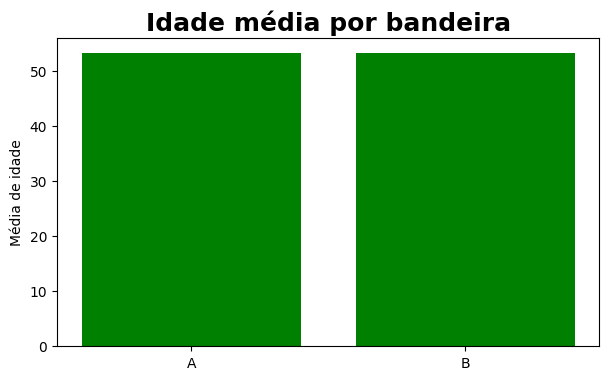

In [32]:
fig = plt.figure(figsize=(7,4))
plt.bar(agg_idade_bandeira['bandeira'], agg_idade_bandeira['idade'], color='green')
plt.ylabel('Média de idade')
plt.title('Idade média por bandeira', loc='center', fontsize=18, fontweight='bold', color='black');

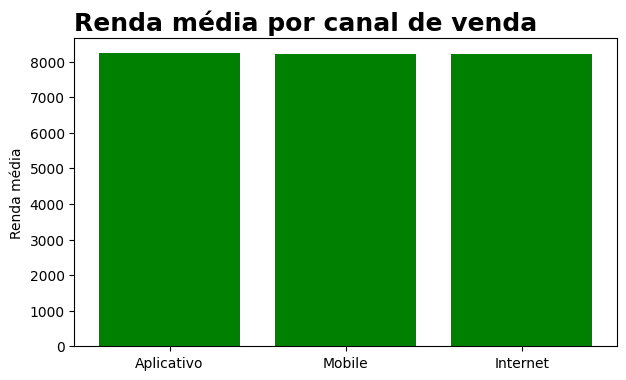

In [33]:
fig = plt.figure(figsize=(7,4))
plt.bar(agg_idcanal_renda['idcanalvenda'], agg_idcanal_renda['renda'], color='green')
plt.ylabel('Renda média')
plt.title('Renda média por canal de venda', loc='left', fontsize=18, fontweight='bold', color='black');

In [34]:
vendas_por_data = vendas_correto.groupby('Data').idcompra.nunique().reset_index()
vendas_por_data = vendas_por_data.sort_values(by='Data', ascending=True)
vendas_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


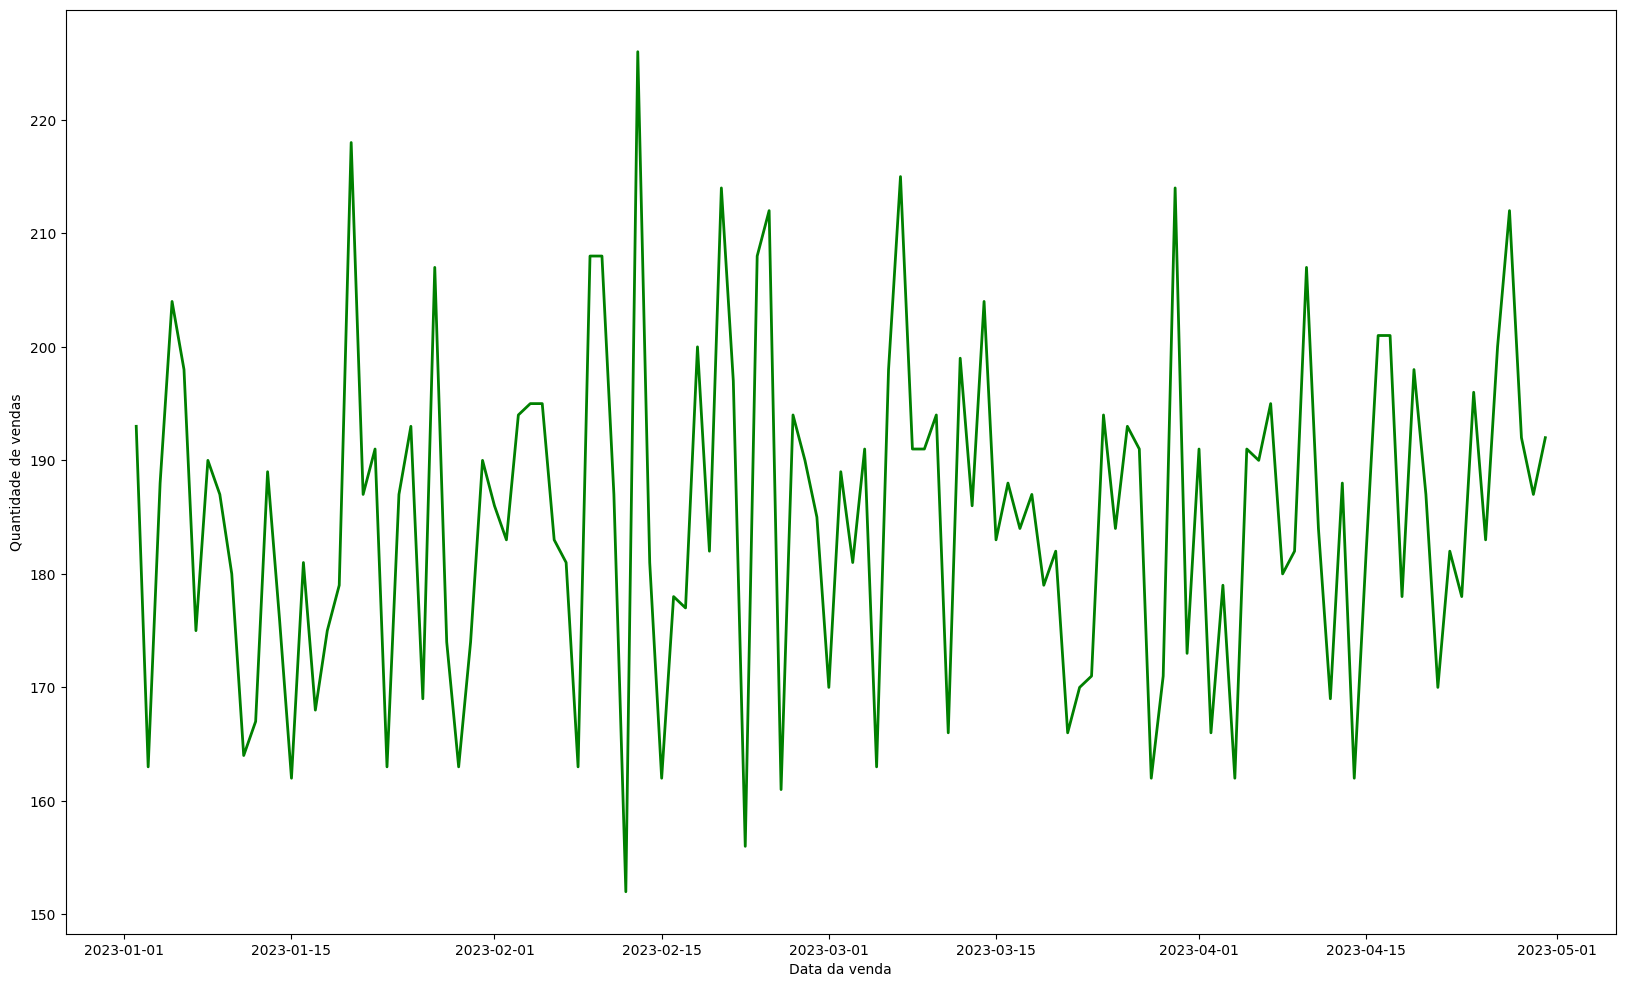

In [35]:
fig = plt.figure(figsize=(20,12))
plt.xlabel('Data da venda')
plt.ylabel('Quantidade de vendas')
x = vendas_por_data['Data']
y = vendas_por_data['idcompra']

plt.plot(x, y, color='green', linewidth = '2')
plt.show()

In [36]:
agg_dept_preco = round(vendas_correto.groupby('Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending=False).reset_index(),2)

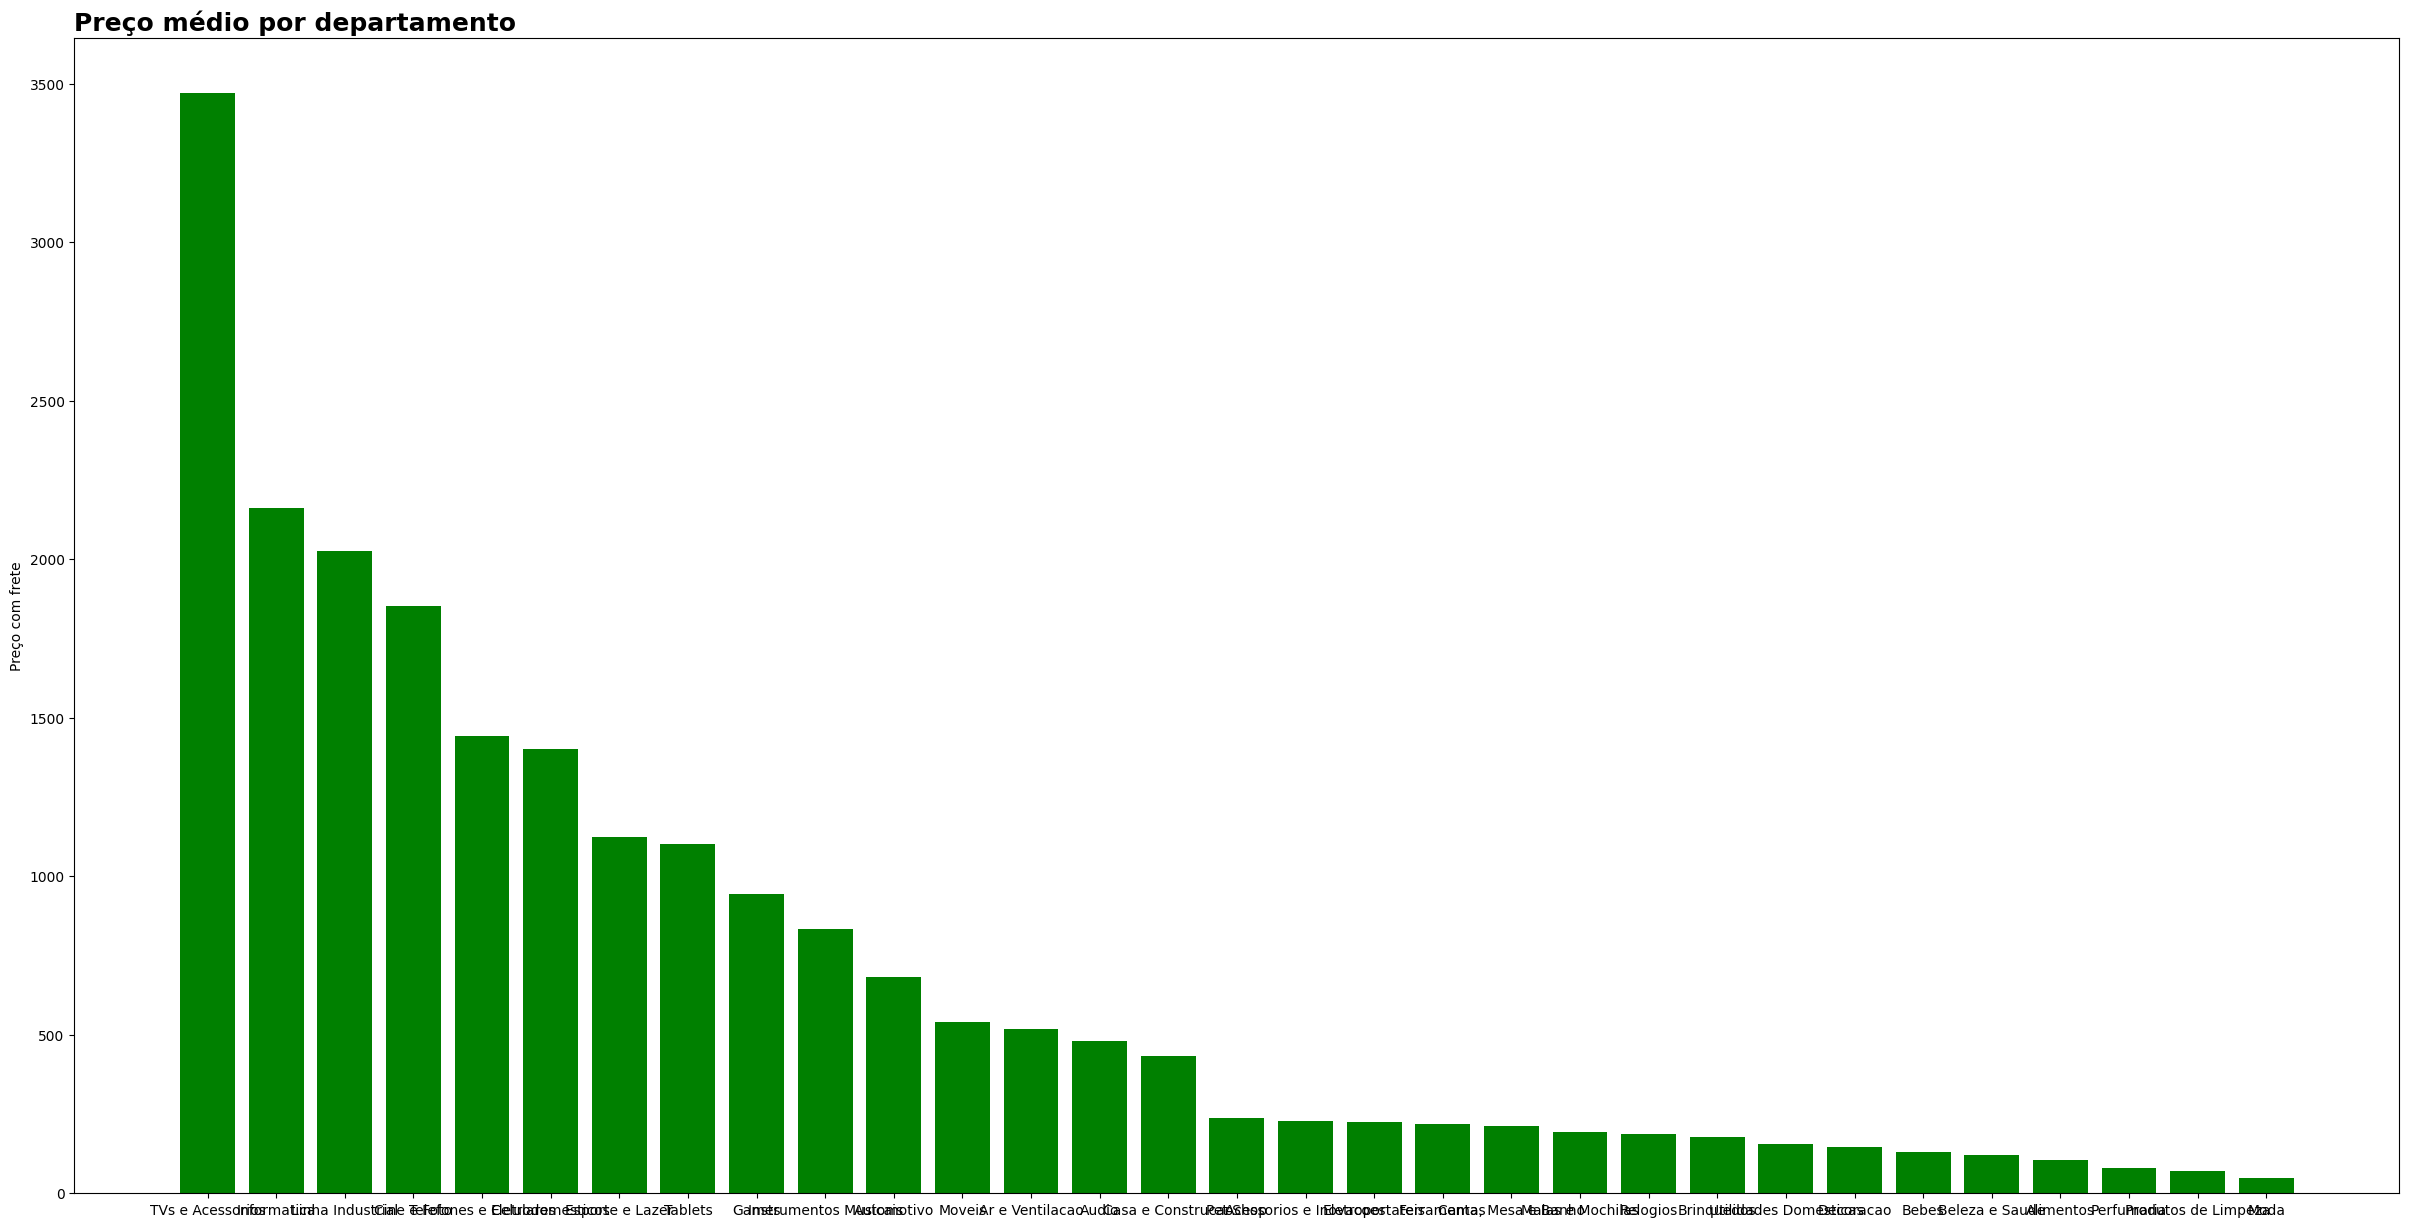

In [37]:
fig = plt.figure(figsize=(30,15))
plt.bar(agg_dept_preco['Nome_Departamento'], agg_dept_preco['Preço_com_frete'], color='green')
plt.ylabel('Preço com frete')
plt.title('Preço médio por departamento', loc='left', fontsize=18, fontweight='bold', color='black');

In [38]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00


In [39]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [40]:
px.bar(agg_idade_bandeira, x = 'bandeira', y = 'idade')

In [41]:
px.line(vendas_por_data, x = 'Data', y = 'idcompra')

In [44]:
px.bar(agg_dept_preco, x='Nome_Departamento', y='Preço_com_frete')